In [3]:
!ls

README.md		       output_image.png
captionGenerator.ipynb	       output_image_5k.png
convertMaskToCityScapes.ipynb  prescanToCityScapes.ipynb
cropping.ipynb		       pushdownloadedmodeltohub.ipynb
datasetCreation.ipynb	       semanticGenerator.ipynb
environment.yml		       testing_bro.ipynb
imagesExtractor.ipynb	       train_controlnet.py
inference.ipynb		       validation.png
output


Using device: cuda


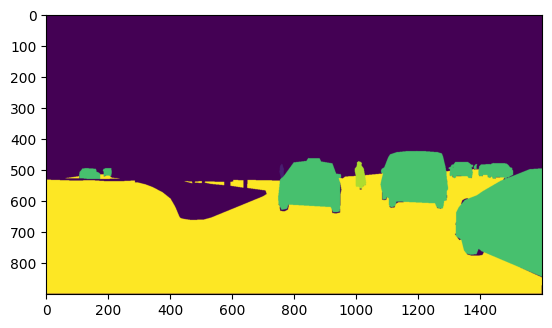

In [6]:
from diffusers import ControlNetModel, StableDiffusionControlNetPipeline
import torch
import matplotlib.pyplot as plt
from torchvision import transforms

torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Intialize the controlnet model
controlnet = ControlNetModel.from_pretrained("JaspervanLeuven/controlnet2.5k")
pipeline = StableDiffusionControlNetPipeline.from_pretrained(
	"runwayml/stable-diffusion-v1-5", controlnet=controlnet
).to(device = device, dtpyes = torch.float16)


prompt = " In this driving scene the following objects can be observed: 8 times a pedestrian which is moving, 13 times a car which is parked, 2 times a pushable_pullable"
controle_image= "/mnt/d/TrainingDiffusers/validation.png"

#convert image to pil
from PIL import Image
controle_image = Image.open(controle_image)
# make sure to resize the image to 512x512
factor = 900 / 512
transform = transforms.Compose([
    transforms.Resize((int(900/factor) , int(1600/factor))),  # Resize the image to 512x512 pixels
    # transforms.CenterCrop(512),
    transforms.ToTensor()           # Convert the image to a tensor
])

# Apply the transformation
transformed_tensor = transform(controle_image)



generated_image = pipeline( prompt,  transformed_tensor[:3,:,:].unsqueeze(0),  guidance_scale=9.5, negative_prompt="simulation, blurry").images[0]
generated_image.save("output_image_5k.png")

